In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

Uploading the dataset

In [2]:
 df = pd.read_excel(r"/content/drive/MyDrive/Telco_customer_churn (1).xlsx")

In [3]:
# Display First Few Rows
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

Data Preprocessing and Handling Missing Values

In [4]:
numeric_df = df.select_dtypes(include=np.number)
df[numeric_df.columns] = df[numeric_df.columns].fillna(numeric_df.median())

In [5]:
# Encoding Categorical Variables
label_enc = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].apply(type).nunique() > 1:
        df[col] = df[col].astype(str)
    df[col] = label_enc.fit_transform(df[col])

In [6]:
# Feature Selection
features = [ 'Monthly Charges','Total Charges','CLTV','Churn Score','Payment Method','Contract']
target = 'Churn Value'

In [7]:
X = df[features]
y = df[target]

In [8]:
y = label_enc.fit_transform(y)

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
!pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


In [12]:
import sklearn
import xgboost

print("Scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)


Scikit-learn version: 1.1.3
XGBoost version: 2.1.4


In [13]:
!pip install scikit-learn==1.1.3


  Using cached scikit_learn-1.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached scikit_learn-1.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (32.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.
bigframes 1.34.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


Model Training

In [27]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
# Predictions
y_pred = model.predict(X_test)

Model Evaluation

In [16]:
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_score)
print(classification_report(y_test, y_pred))

Accuracy: 0.9112845990063875
ROC-AUC Score: 0.8852452923686819
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1009
           1       0.86      0.82      0.84       400

    accuracy                           0.91      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.91      0.91      0.91      1409



Feature Importance

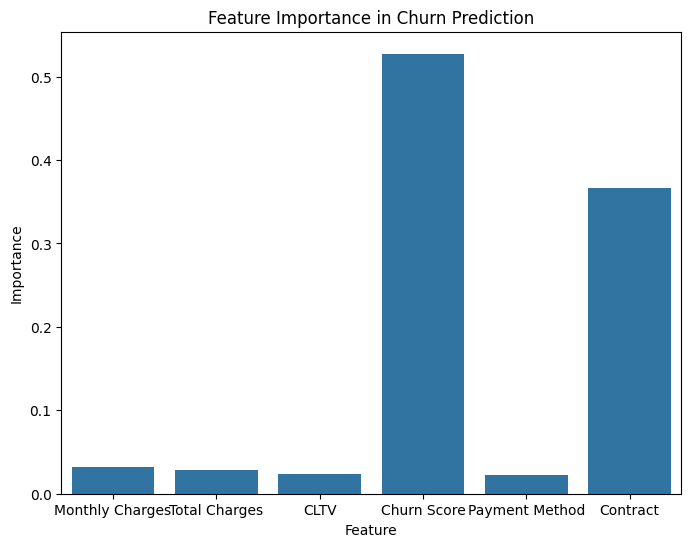

In [17]:
# Feature Importance
feature_importance = model.feature_importances_
plt.figure(figsize=(8,6))
sns.barplot(x=features, y=feature_importance)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Churn Prediction")
plt.show()

Customer Retention & Churn Overview

<ipython-input-19-559b51ffd2cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Value', data=df, palette=['green', 'red'])


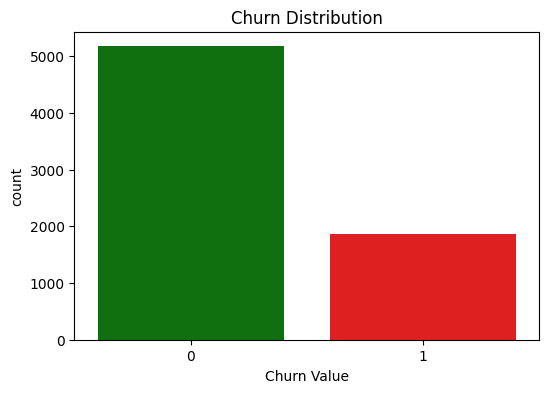

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn Value', data=df, palette=['green', 'red'])
plt.title('Churn Distribution')
plt.show()

Monthly Charges vs. Churn

<ipython-input-24-b61ab3eafaf2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Value', y='Monthly Charges', data=df, palette=['blue', 'orange'])


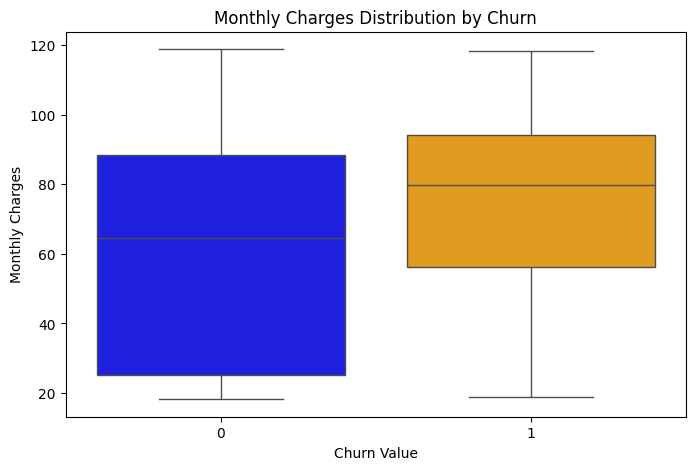

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn Value', y='Monthly Charges', data=df, palette=['blue', 'orange'])
plt.title('Monthly Charges Distribution by Churn')
plt.show()

Model Performance Evaluation

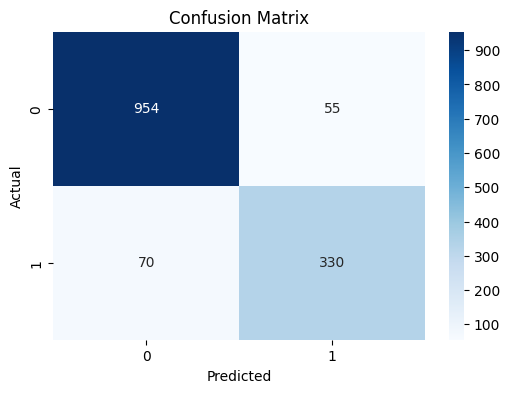

In [26]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()